In [1]:
import pandas as pd
import numpy as np
import opendatasets as od
import os
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from datetime import datetime

#Local Libraries
import wrangle_o
import utilities
import modeling

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
wrangle_o.pull_data()

Olympic data pulled


In [3]:
# To fill na, adjust "born" column to approriate date formats
wrangle_o.athlete_bio()

In [4]:
bio = pd.read_csv('clean_olympic_athlete_bio.csv',keep_default_na=False)
er = pd.read_csv('Olympic_Athlete_Event_Results.csv')
res = pd.read_csv('Olympic_Results.csv')
country = pd.read_csv('Olympics_country.csv')
games = pd.read_csv('Olympics_Games.csv')
mt = pd.read_csv('Olympic_Games_Medal_Tally.csv')

In [5]:
olympics = wrangle_o.merge_data(bio, er, res, country, games)

Use df: 'olympics'


In [6]:
olympics = wrangle_o.wrangle_olympics(olympics)

In [7]:
# Long code of replacing weight measurements and birth data- Takes a bit of time
olympics = wrangle_o.replace_olympics(olympics)

In [8]:
wrangle_o.height_weight_age_data(olympics)

,athlete_id,name,sex,height,weight,country,country_noc_x,edition,sport,event,result_id,medal,isTeamSport,city,country_noc_y,event_year,medalist,home,age,bmi
0,14503,scar Giraldo,Male,175.37,70.62,Colombia,COL,Summer Olympics,Cycling Road,"Road Race, Individual, Men",154878,participant,0,Atlanta,USA,1996-01-01,0,0,22.00,22.96
1,58758,Hossein Mollaghasemi,Male,173.00,63.00,Islamic Republic of Iran,IRI,Summer Olympics,Wrestling,"Featherweight, Greco-Roman, Men",124658,participant,0,Roma,ITA,1960-01-01,0,0,26.00,21.05
2,58758,Hossein Mollaghasemi,Male,173.00,63.00,Islamic Republic of Iran,IRI,Summer Olympics,Wrestling,"Lightweight, Greco-Roman, Men",125396,participant,0,Tokyo,JPN,1964-01-01,0,0,30.00,21.05
3,90217,Enrico Lazzarotto,Male,178.00,72.00,Italy,ITA,Summer Olympics,Canoe Slalom,"Kayak Singles, Slalom, Men",256271,participant,0,Sydney,AUS,2000-01-01,0,0,26.00,22.72
4,74565,John Hou,Male,178.00,60.00,Papua New Guinea,PNG,Summer Olympics,Athletics,"100 metres, Men",63261,participant,0,Seoul,KOR,1988-01-01,0,0,20.00,18.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314720,30727,Armando Valles,Male,170.00,68.00,Mexico,MEX,Summer Olympics,Artistic Gymnastics,"Horse Vault, Men",70306,participant,0,Ciudad de México,MEX,1968-01-01,0,1,26.00,23.53
314721,30727,Armando Valles,Male,170.00,68.00,Mexico,MEX,Summer Olympics,Artistic Gymnastics,"Parallel Bars, Men",70309,participant,0,Ciudad de México,MEX,1968-01-01,0,1,26.00,23.53
314722,30727,Armando Valles,Male,170.00,68.00,Mexico,MEX,Summer Olympics,Artistic Gymnastics,"Horizontal Bar, Men",70312,participant,0,Ciudad de México,MEX,1968-01-01,0,1,26.00,23.53
314723,30727,Armando Valles,Male,170.00,68.00,Mexico,MEX,Summer Olympics,Artistic Gymnastics,"Rings, Men",70315,participant,0,Ciudad de México,MEX,1968-01-01,0,1,26.00,23.53


In [9]:
olympics = olympics.drop(['born','year_born'], axis=1)
olympics

,athlete_id,name,sex,height,weight,country,country_noc_x,edition,sport,event,result_id,medal,isTeamSport,city,country_noc_y,event_year,medalist,home,age,bmi
0,14503,scar Giraldo,Male,175.37,70.62,Colombia,COL,Summer Olympics,Cycling Road,"Road Race, Individual, Men",154878,participant,0,Atlanta,USA,1996-01-01,0,0,22.00,22.96
1,58758,Hossein Mollaghasemi,Male,173.00,63.00,Islamic Republic of Iran,IRI,Summer Olympics,Wrestling,"Featherweight, Greco-Roman, Men",124658,participant,0,Roma,ITA,1960-01-01,0,0,26.00,21.05
2,58758,Hossein Mollaghasemi,Male,173.00,63.00,Islamic Republic of Iran,IRI,Summer Olympics,Wrestling,"Lightweight, Greco-Roman, Men",125396,participant,0,Tokyo,JPN,1964-01-01,0,0,30.00,21.05
3,90217,Enrico Lazzarotto,Male,178.00,72.00,Italy,ITA,Summer Olympics,Canoe Slalom,"Kayak Singles, Slalom, Men",256271,participant,0,Sydney,AUS,2000-01-01,0,0,26.00,22.72
4,74565,John Hou,Male,178.00,60.00,Papua New Guinea,PNG,Summer Olympics,Athletics,"100 metres, Men",63261,participant,0,Seoul,KOR,1988-01-01,0,0,20.00,18.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314720,30727,Armando Valles,Male,170.00,68.00,Mexico,MEX,Summer Olympics,Artistic Gymnastics,"Horse Vault, Men",70306,participant,0,Ciudad de México,MEX,1968-01-01,0,1,26.00,23.53
314721,30727,Armando Valles,Male,170.00,68.00,Mexico,MEX,Summer Olympics,Artistic Gymnastics,"Parallel Bars, Men",70309,participant,0,Ciudad de México,MEX,1968-01-01,0,1,26.00,23.53
314722,30727,Armando Valles,Male,170.00,68.00,Mexico,MEX,Summer Olympics,Artistic Gymnastics,"Horizontal Bar, Men",70312,participant,0,Ciudad de México,MEX,1968-01-01,0,1,26.00,23.53
314723,30727,Armando Valles,Male,170.00,68.00,Mexico,MEX,Summer Olympics,Artistic Gymnastics,"Rings, Men",70315,participant,0,Ciudad de México,MEX,1968-01-01,0,1,26.00,23.53


In [10]:
olympics.medalist.value_counts()

0    269867
1     44535
Name: medalist, dtype: int64

In [11]:
# Null values Gone!
olympics.isnull().sum()

athlete_id       0
name             0
sex              0
height           0
weight           0
country          0
country_noc_x    0
edition          0
sport            0
event            0
result_id        0
medal            0
isTeamSport      0
city             0
country_noc_y    0
event_year       0
medalist         0
home             0
age              0
bmi              0
dtype: int64

### Outlier Detection
- Not likely to use since outliers may be key information on medaling.

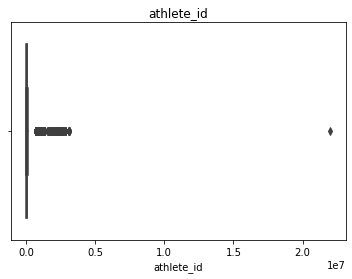

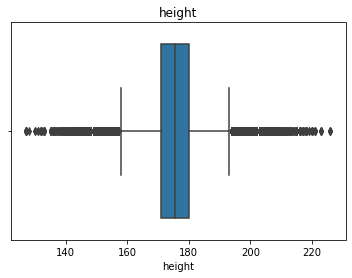

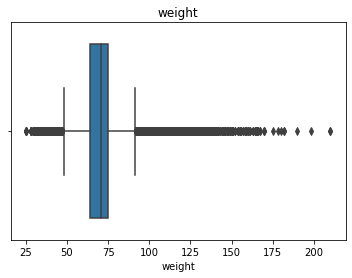

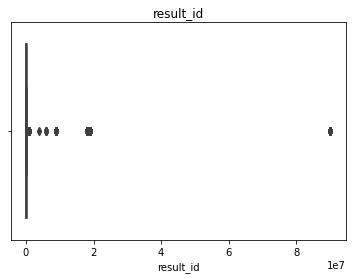

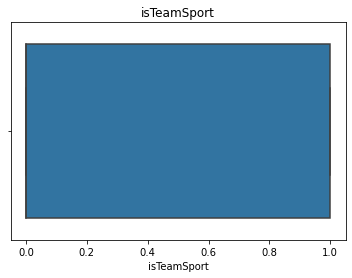

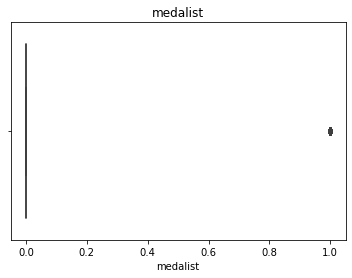

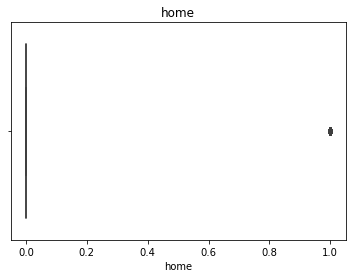

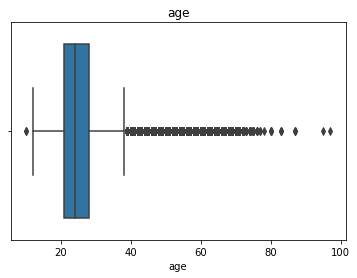

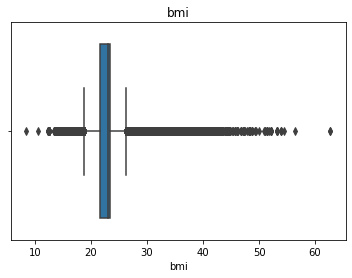

In [12]:
for col in olympics.select_dtypes('number'):
    sns.boxplot(olympics[col])
    plt.title(col)
    plt.show()

### Outlier takeaway
- There are some outliers, however because each sport may have different requirements, we don't want to lose any potential outliers.

# EDA
### Key Questions
 1. What is the likelihood of medaling? (Establish Baseline)
 2. Is being home (host nation) increase chances of medaling?
 3. Does being on a team sport increase chances of medaling?
 4. Does overall age impact medaling?
 5. Does bmi impact medaling?

In [13]:
olympics.event_year.value_counts()

1992-01-01    17198
1988-01-01    15946
2020-01-01    14786
2000-01-01    14032
1996-01-01    13994
2008-01-01    13975
2016-01-01    13941
2004-01-01    13756
2012-01-01    13196
1972-01-01    12586
1984-01-01    12288
1968-01-01    11174
1976-01-01    10869
1952-01-01    10214
1964-01-01    10105
1960-01-01     9680
1980-01-01     9267
1936-01-01     8529
1948-01-01     8258
1924-01-01     7065
1956-01-01     6650
1928-01-01     6394
1912-01-01     5424
2022-01-01     5388
2018-01-01     5196
2014-01-01     4984
1920-01-01     4639
2010-01-01     4467
2006-01-01     4403
2002-01-01     4127
1932-01-01     4084
1908-01-01     4023
1998-01-01     3698
1994-01-01     3225
1900-01-01     3147
1904-01-01     3075
1896-01-01      619
Name: event_year, dtype: int64

In [14]:
# Split Data
train, validate, test = utilities.split_data(olympics)

Data split as follows: Train 56.00%, Validate 24.00%, Test 20.00%


In [15]:
train.shape, validate.shape, test.shape

((176064, 20), (75457, 20), (62881, 20))

In [16]:
train.columns

Index(['athlete_id', 'name', 'sex', 'height', 'weight', 'country',
       'country_noc_x', 'edition', 'sport', 'event', 'result_id', 'medal',
       'isTeamSport', 'city', 'country_noc_y', 'event_year', 'medalist',
       'home', 'age', 'bmi'],
      dtype='object')

In [17]:
# category
target = ['medalist']
categorical = ['sex','edition','sport','isTeamSport','home','event_year', 'medal']
event = ['event']
country_data = ['country','country_noc_x','country_noc_y']
continuous = ['height','weight','age','bmi']

### Understanding Baseline
1. What is the likelihood of medaling in the Olympics? 

In [18]:
train.medal.value_counts()

participant    151036
Gold             8427
Bronze           8404
Silver           8197
Name: medal, dtype: int64

In [19]:
n = train.shape[0]
n

176064

In [20]:
train.medalist.value_counts()

0    151036
1     25028
Name: medalist, dtype: int64

In [21]:
train.medal.value_counts()/n

participant                   0.86
Gold                          0.05
Bronze                        0.05
Silver                        0.05
Name: medal, dtype: float64

In [22]:
train.medalist.value_counts()/n

0                   0.86
1                   0.14
Name: medalist, dtype: float64

In [23]:
medalist = pd.DataFrame({'Yes':train.medalist.sum(),'No':(train.medalist == 0).sum()}, index = ['medalist']).T 

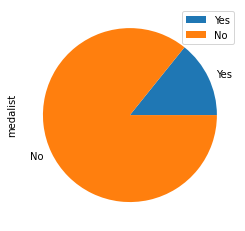

In [24]:
plot = medalist.plot.pie(y='medalist')

### Takeaway:
1. 86 % of athletes do not medal
2. 14 % of athletes medal

Baseline Established!

### Univariate

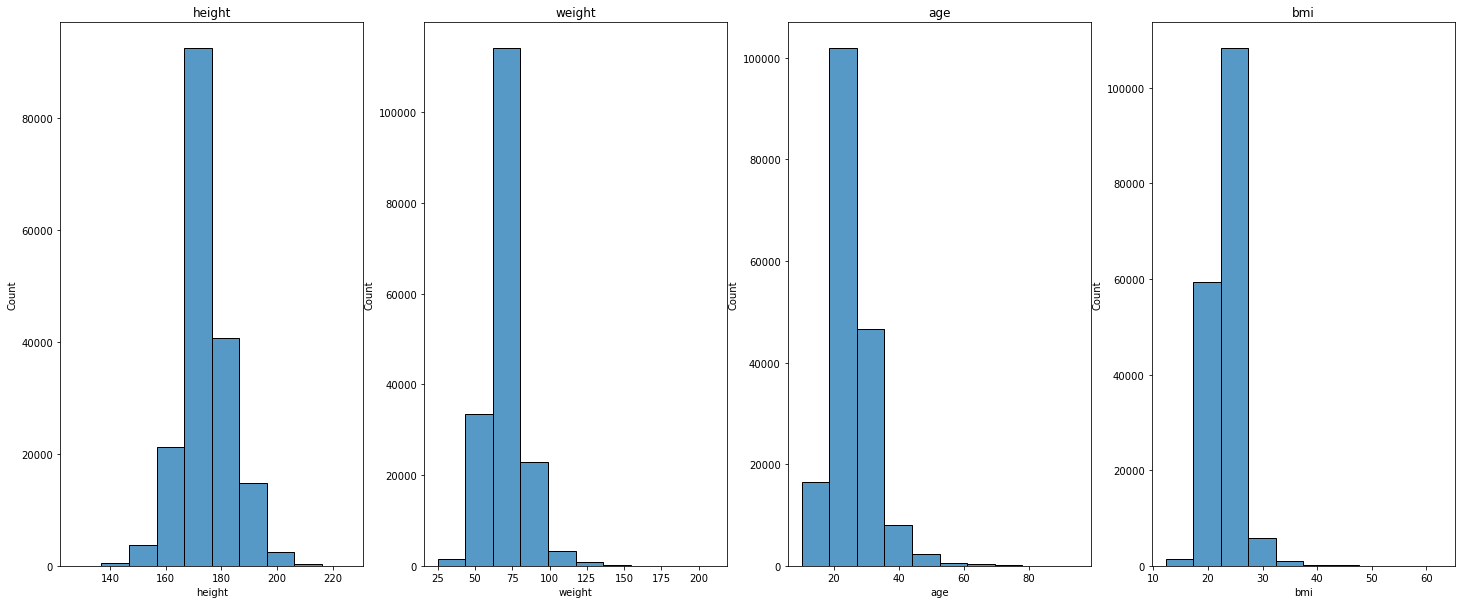

In [25]:
utilities.plot_histograms(train, continuous)

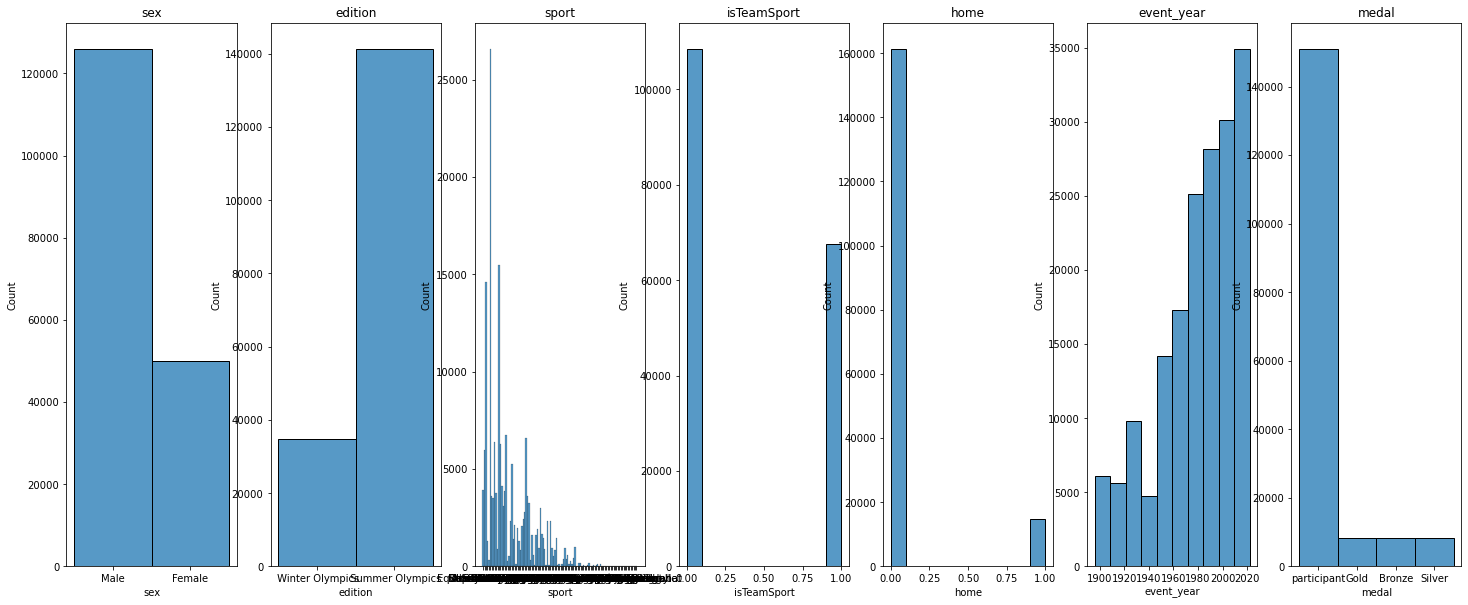

In [26]:
utilities.plot_histograms(train, categorical)

### Bivariate

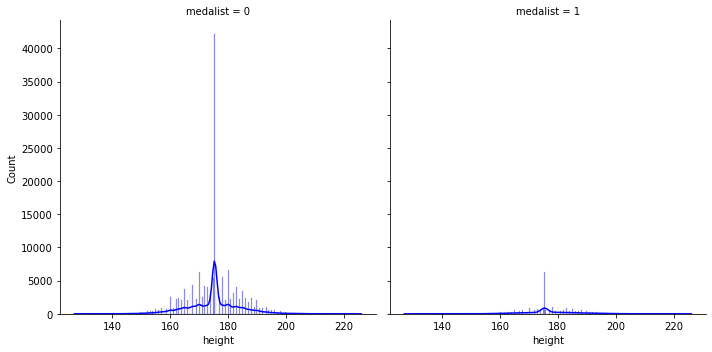

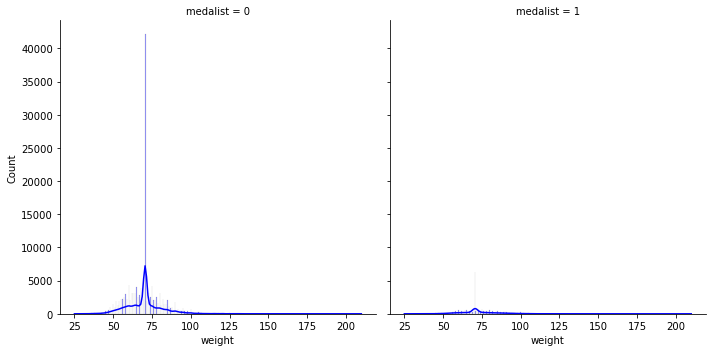

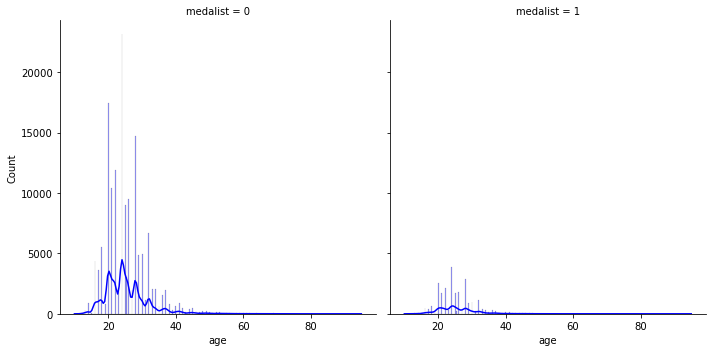

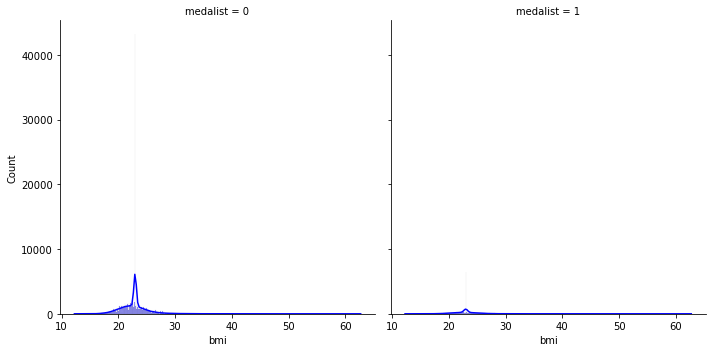

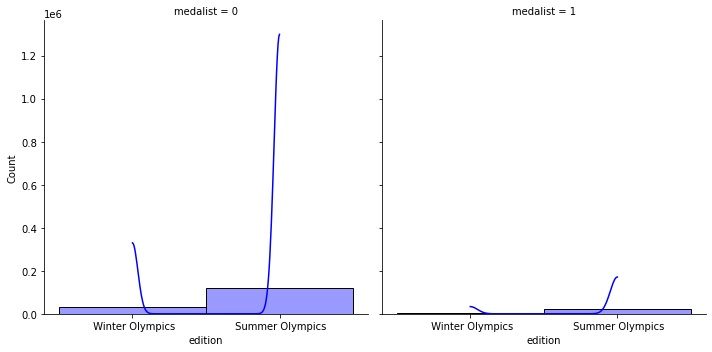

In [27]:
sns.displot(data = train, x = 'height', col = 'medalist', kde = True, color = 'blue', alpha = 0.4)
plt.show()
sns.displot(data = train, x = 'weight', col = 'medalist', kde = True, color = 'blue', alpha = 0.4)
plt.show()
sns.displot(data = train, x = 'age', col = 'medalist', kde = True, color = 'blue', alpha = 0.4)
plt.show()
sns.displot(data = train, x = 'bmi', col = 'medalist', kde = True, color = 'blue', alpha = 0.4)
plt.show()
sns.displot(data = train, x = 'edition', col = 'medalist', kde = True, color = 'blue', alpha = 0.4)
plt.show()

### Multivariate - general correlation 
 - Questioning why I even include this.

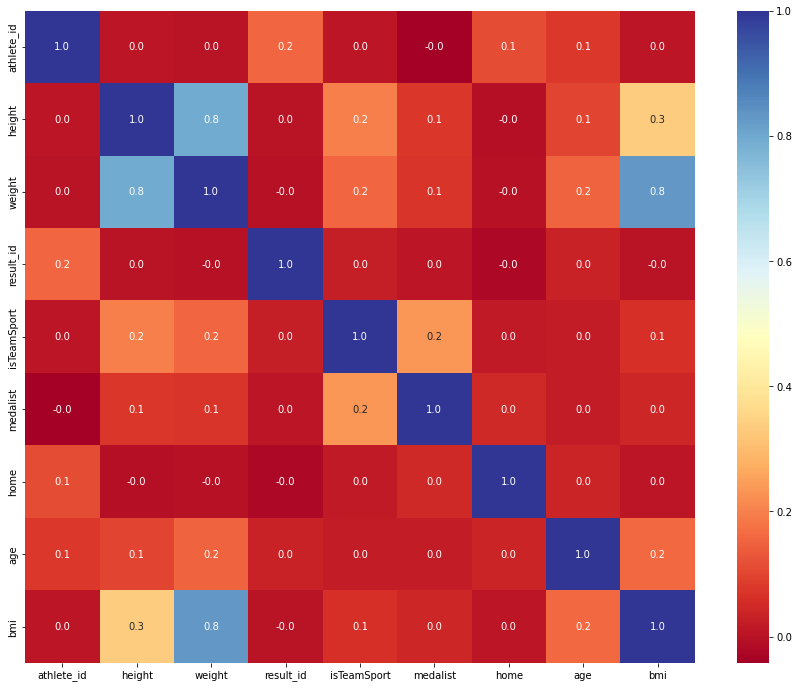

In [28]:
# Heatmap to display correlation of the features and logerror.
plt.figure(figsize = (15, 12))
sns.heatmap(train.corr(), cmap="RdYlBu", annot=True, fmt=".1f")
plt.show()

### Questions of Data (Categorical)

1. Is being the host nation a factor for medaling?
2. Is Team Sport a variable for medaling?

In [29]:
train.groupby(['medalist', 'home']).mean().astype(np.int)

athlete_id  height  weight  result_id  isTeamSport  age  bmi
medalist home                                                              
0        0         117315     175      70    1519259            0   25   22
         1         241318     174      70    1259368            0   26   22
1        0          98066     177      72    1694730            0   25   23
         1          92042     176      71     743028            0   25   22

<AxesSubplot:xlabel='medalist', ylabel='home'>

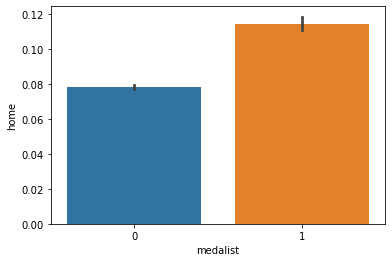

In [30]:
sns.barplot(data = train, x='medalist', y='home')

In [31]:
# Chi^2 test on categories
alpha=0.05
groups = ['isTeamSport','home','edition']
reject_null = []
medal_rate=[]
for group in groups:
    observed = pd.crosstab(train.medalist, train[group])
    chi2, p, dof, expected = stats.chi2_contingency(observed)
    print(group)
#     print('Observed\n')
#     print(observed.values)
#     print('---\nExpected\n')
#     print(expected.astype(int))
#     print('---\n')
    print(f'chi^2 = {chi2:.4f}')
    print(f'p     = {p:.4f}\n')
    if p < alpha:
        print("We reject the null hypothesis")
    else:
        print("We fail to reject the null hypothesis")
    medal_rate.append((train.medalist[train[group] == 1]).mean())
    reject_null.append(p<alpha)
    
results = pd.DataFrame(data = {'medal_rate':medal_rate,'reject_null':reject_null},index = groups)
results = results.sort_values(by= 'medal_rate')

isTeamSport
chi^2 = 9496.4912
p     = 0.0000

We reject the null hypothesis
home
chi^2 = 368.8961
p     = 0.0000

We reject the null hypothesis
edition
chi^2 = 201.2741
p     = 0.0000

We reject the null hypothesis


In [32]:
results

,medal_rate,reject_null
home,0.20,True
isTeamSport,0.24,True
edition,NaN,True


In [33]:
train.medalist.value_counts()

0    151036
1     25028
Name: medalist, dtype: int64

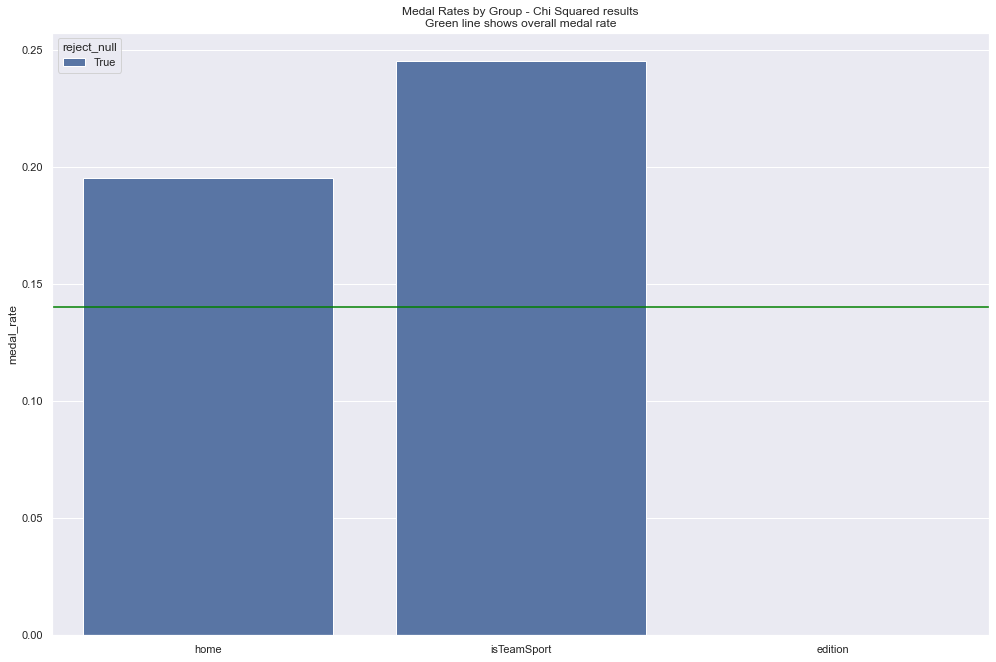

In [34]:
baseline_medal =0.14
sns.set(rc={'figure.figsize':(14,9)})
sns.barplot(data = results, x = results.index ,y = 'medal_rate', hue = 'reject_null')
plt.tight_layout()
plt.title('Medal Rates by Group - Chi Squared results\nGreen line shows overall medal rate')
plt.axhline(y=baseline_medal, color = 'green')
# plt.bar_label(splot.containers[0])

### Continuous Variable Questions
 4. Does overall age impact medaling?
 5. Does bmi impact medaling?

#### Age

<function matplotlib.pyplot.show(close=None, block=None)>

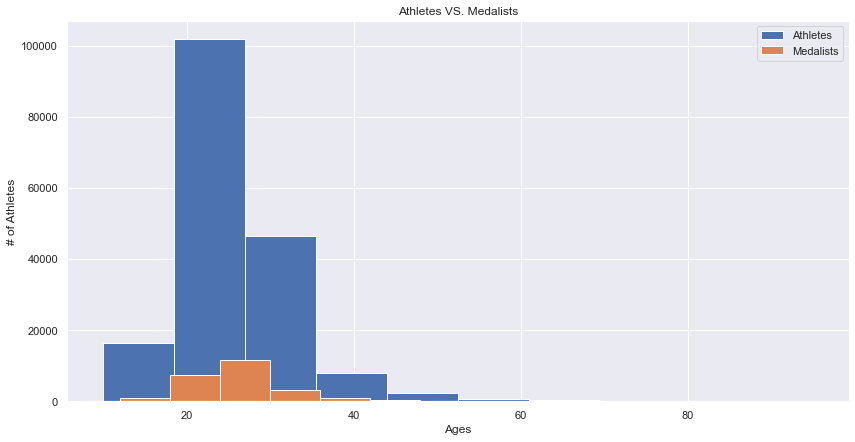

In [35]:
train.age.hist()
plt.title('Age of medalists')
plt.xlabel('age')
plt.ylabel('# of Athletes')

medal_sample = train[train.medalist == 1].age
medal_sample.hist(figsize=(14,7))

plt.title('Athletes VS. Medalists')
plt.xlabel('Ages')
plt.ylabel('# of Athletes')
plt.legend(labels = ['Athletes', 'Medalists'])
plt.show

In [36]:
alpha = 0.01
medal_sample = train[train.medalist == 1].age
overall_mean = train.age.mean()

t, p = stats.ttest_1samp(medal_sample, overall_mean)

print(t, p/2, alpha)

8.655641438168386 2.595637330253769e-18 0.01


In [37]:
if p > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


#### BMI

<function matplotlib.pyplot.show(close=None, block=None)>

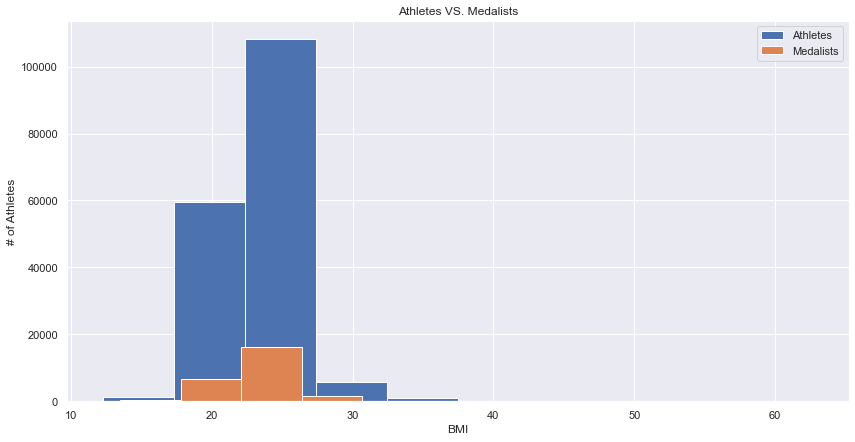

In [38]:
train.bmi.hist()
plt.title('BMI of medalists')
plt.xlabel('BMI')
plt.ylabel('# of Athletes')

medal_sample = train[train.medalist == 1].bmi
medal_sample.hist(figsize=(14,7))

plt.title('Athletes VS. Medalists')
plt.xlabel('BMI')
plt.ylabel('# of Athletes')
plt.legend(labels = ['Athletes', 'Medalists'])
plt.show

In [39]:
medal_sample = train[train.medalist == 1].bmi
overall_mean = train.bmi.mean()

t, p = stats.ttest_1samp(medal_sample, overall_mean)

print(t, p/2, alpha)

15.320788671486348 4.820964864753437e-53 0.01


In [40]:
if p > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


## EDA Takeaways:
Key Factors for  Feature selection:
1. Home (Athlete home country is host)
2. Team Sports 
3. Age
4. BMI


# Modeling

In [41]:
selected_features = ['home','isTeamSport','age','bmi']
target = 'medalist'

In [44]:
X_train = train[selected_features]
y_train = train[[target]]

X_validate = validate[selected_features]
y_validate = validate[[target]]

X_test = test[selected_features]
y_test = test[[target]]

In [45]:
# Check Split
X_train[:3]

,home,isTeamSport,age,bmi
98265,0,1,32.00,27.34
177475,0,0,30.00,22.96
89882,0,1,22.00,23.72


In [46]:
y_train[:3]

,medalist
98265,0
177475,0
89882,0


In [47]:
depths =[]
min_samples = []
train_accuracies = []
train_precisions = []
train_recalls = []

v_accuracies = []
v_precisions = []
v_recalls = []
min_samples_range = range(1,10)
d_range = range(1,10)
for d in d_range:
    for min_sample in min_samples_range:
        clf, train_report = modeling.decision_tree_train(X_train, y_train,selected_features, target, d=d, m = min_sample , print_results=False)
        validate_report = modeling.classifier_validate(X_validate,y_validate, clf, print_results=False)

        depths.append(d)
        min_samples.append(min_sample)
        train_accuracies.append(train_report['accuracy'])
        train_precisions.append(train_report['precision'])
        train_recalls.append(train_report['recall'])

        v_accuracies.append(validate_report['accuracy'])
        v_precisions.append(validate_report['precision'])
        v_recalls.append(validate_report['recall'])

train_results_df= pd.DataFrame(data = {"max_depth":depths,"min_samples_leaf":min_samples,"accuracy":train_accuracies,"precision":train_precisions,"recall":train_recalls})
validate_results_df= pd.DataFrame(data = {"max_depth":depths,"min_samples_leaf":min_samples,"accuracy":v_accuracies,"precision":v_precisions,"recall":v_recalls})

combined_df = train_results_df.merge(validate_results_df,on=['max_depth','min_samples_leaf'], suffixes=['_train','_validate'])
combined_df["accuracy_diff"] = combined_df.accuracy_validate-combined_df.accuracy_train
combined_df["precision_diff"] = combined_df.precision_validate-combined_df.precision_train
combined_df["recall_diff"] = combined_df.recall_validate-combined_df.recall_train

combined_df = combined_df.sort_values(by =['accuracy_validate','accuracy_diff'], ascending=False)
print(f"Highest accuracy score on train:\n {combined_df.accuracy_train.max()} with max depth setting of {combined_df.max_depth[combined_df.accuracy_train.idxmax()]} and min_sample_leaf of {combined_df.min_samples_leaf[combined_df.accuracy_train.idxmax()]}")
print(f"Highest accuracy score on validate:\n{combined_df.accuracy_validate.max()} with max depth setting of {combined_df.max_depth[combined_df.accuracy_validate.idxmax()]} and min_sample_leaf of {combined_df.min_samples_leaf[combined_df.accuracy_validate.idxmax()]}")
print(f"This was a drop-off from train of:\n{combined_df.accuracy_diff[combined_df.accuracy_validate == combined_df.accuracy_validate.max()].array[0]}")
print(f"Lowest drop-off in accuracy from train to validate:\n {combined_df.accuracy_diff.max()} with max depth setting of {combined_df.max_depth[combined_df.accuracy_diff == combined_df.accuracy_diff.max()].array[0]} and min sample leaf of  {combined_df.min_samples_leaf[combined_df.accuracy_diff == combined_df.accuracy_diff.max()].array[0]}")

decision_tree_final_results = combined_df
decision_tree_final_results["model"] = 'decision_tree'

Highest accuracy score on train:
 0.8590171755725191 with max depth setting of 9 and min_sample_leaf of 1
Highest accuracy score on validate:
0.8605695959288071 with max depth setting of 6 and min_sample_leaf of 6
This was a drop-off from train of:
0.0025009390767533057
Lowest drop-off in accuracy from train to validate:
 0.002695944274742179 with max depth setting of 1 and min sample leaf of  1


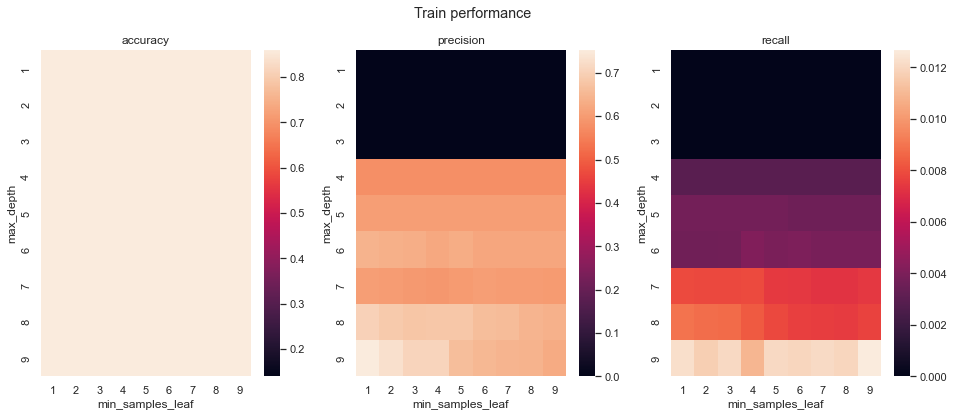

In [48]:
_, ax = plt.subplots(1,3, figsize=(16,6))
to_plot = ["accuracy","precision","recall"]
for i, metric in enumerate(to_plot):
    heatmap_df = train_results_df.pivot("max_depth","min_samples_leaf",metric)
    # Set floor of accuracy at the baseline 
    if i == 0:
        sns.heatmap(heatmap_df, ax=ax[i], vmin = baseline_medal)
        ax[i].set_title(metric)
    else:
        sns.heatmap(heatmap_df, ax=ax[i])
        ax[i].set_title(metric)
    plt.suptitle('Train performance')

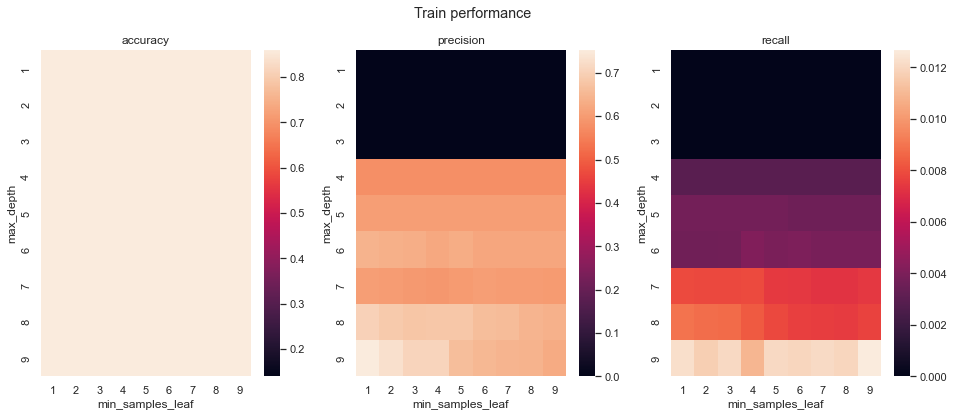

In [49]:
_, ax = plt.subplots(1,3, figsize=(16,6))
to_plot = ["accuracy","precision","recall"]
for i, metric in enumerate(to_plot):
    heatmap_df = train_results_df.pivot("max_depth","min_samples_leaf",metric)
    # Set floor of accuracy at the baseline 
    if i == 0:
        sns.heatmap(heatmap_df, ax=ax[i], vmin = baseline_medal)
        ax[i].set_title(metric)
    else:
        sns.heatmap(heatmap_df, ax=ax[i])
        ax[i].set_title(metric)
    plt.suptitle('Train performance')

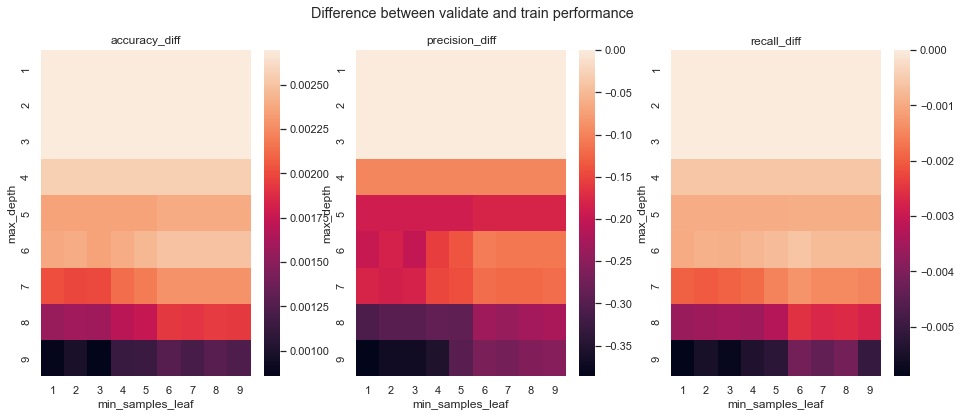

In [50]:
_, ax = plt.subplots(1,3, figsize=(16,6))
to_plot = ["accuracy_diff","precision_diff","recall_diff"]
for i, metric in enumerate(to_plot):
    heatmap_df = combined_df.pivot("max_depth","min_samples_leaf",metric)
    sns.heatmap(heatmap_df, ax=ax[i])
    plt.suptitle('Difference between validate and train performance')
    ax[i].set_title(metric)

In [53]:
import graphviz
from sklearn import tree

In [56]:
from dtreeviz.trees import dtreeviz

In [57]:
# dot_data=tree.export_graphviz(clf, out_file=None,
#                               feature_names=X_train,
#                               class_names=y_train,
#                               filled=True)

ValueError: Length of feature_names, 176064 does not match number of features, 4

In [59]:
viz = dtreeviz(clf, X_train, y_train,
                target_name="target",
                feature_names=X_train,
                class_names=list(y_train))

KeyError: 1

#### Random Forest

In [ ]:
depths =[]
min_samples = []
train_accuracies = []
train_precisions = []
train_recalls = []

v_accuracies = []
v_precisions = []
v_recalls = []
min_samples_range = range(1,10)
d_range = range(1,10)
for d in d_range:
    for min_sample in min_samples_range:
        clf, train_report = modeling.random_forest_train(X_train, y_train,selected_features, target, d=d, m = min_sample , print_results=False)
        validate_report = modeling.classifier_validate(X_validate,y_validate, clf, print_results=False)

        depths.append(d)
        min_samples.append(min_sample)
        train_accuracies.append(train_report['accuracy'])
        train_precisions.append(train_report['precision'])
        train_recalls.append(train_report['recall'])

        v_accuracies.append(validate_report['accuracy'])
        v_precisions.append(validate_report['precision'])
        v_recalls.append(validate_report['recall'])

train_results_df= pd.DataFrame(data = {"max_depth":depths,"min_samples_leaf":min_samples,"accuracy":train_accuracies,"precision":train_precisions,"recall":train_recalls})
validate_results_df= pd.DataFrame(data = {"max_depth":depths,"min_samples_leaf":min_samples,"accuracy":v_accuracies,"precision":v_precisions,"recall":v_recalls})

combined_df = train_results_df.merge(validate_results_df,on=['max_depth','min_samples_leaf'], suffixes=['_train','_validate'])
combined_df["accuracy_diff"] = combined_df.accuracy_validate-combined_df.accuracy_train
combined_df["precision_diff"] = combined_df.precision_validate-combined_df.precision_train
combined_df["recall_diff"] = combined_df.recall_validate-combined_df.recall_train

combined_df = combined_df.sort_values(by =['accuracy_validate','accuracy_diff'], ascending=False)
print(f"Highest accuracy score on train:\n {combined_df.accuracy_train.max()} with max depth setting of {combined_df.max_depth[combined_df.accuracy_train.idxmax()]} and min_sample_leaf of {combined_df.min_samples_leaf[combined_df.accuracy_train.idxmax()]}")
print(f"Highest accuracy score on validate:\n{combined_df.accuracy_validate.max()} with max depth setting of {combined_df.max_depth[combined_df.accuracy_validate.idxmax()]} and min_sample_leaf of {combined_df.min_samples_leaf[combined_df.accuracy_validate.idxmax()]}")
print(f"This was a drop-off from train of:\n{combined_df.accuracy_diff[combined_df.accuracy_validate == combined_df.accuracy_validate.max()].array[0]}")
print(f"Lowest drop-off in accuracy from train to validate:\n {combined_df.accuracy_diff.max()} with max depth setting of {combined_df.max_depth[combined_df.accuracy_diff == combined_df.accuracy_diff.max()].array[0]} and min sample leaf of  {combined_df.min_samples_leaf[combined_df.accuracy_diff == combined_df.accuracy_diff.max()].array[0]}")

random_forest_final_results = combined_df
random_forest_final_results["model"] = 'random_forest'

In [ ]:
_, ax = plt.subplots(1,3, figsize=(16,6))
to_plot = ["accuracy","precision","recall"]
    
for i, metric in enumerate(to_plot):
    heatmap_df = train_results_df.pivot("max_depth","min_samples_leaf",metric)
    # Set floor of accuracy at the baseline 
    if i == 0:
        sns.heatmap(heatmap_df, ax=ax[i], vmin = baseline_medal)
        ax[i].set_title(metric)
    else:
        sns.heatmap(heatmap_df, ax=ax[i])
        ax[i].set_title(metric)
    plt.suptitle('Train performance')

In [ ]:
_, ax = plt.subplots(1,3, figsize=(16,6))
to_plot = ["accuracy","precision","recall"]
for i, metric in enumerate(to_plot):
    heatmap_df = validate_results_df.pivot("max_depth","min_samples_leaf",metric)
    # Set floor of accuracy at the baseline 
    if i == 0:
        sns.heatmap(heatmap_df, ax=ax[i], vmin = baseline_medal)
        ax[i].set_title(metric)
    else:
        sns.heatmap(heatmap_df, ax=ax[i])
        ax[i].set_title(metric)
    plt.suptitle('Validate performance')

In [ ]:
_, ax = plt.subplots(1,3, figsize=(16,6))
to_plot = ["accuracy_diff","precision_diff","recall_diff"]
for i, metric in enumerate(to_plot):
    heatmap_df = combined_df.pivot("max_depth","min_samples_leaf",metric)
    sns.heatmap(heatmap_df, ax=ax[i])
    plt.suptitle('Difference between validate and train performance')
    ax[i].set_title(metric)

### KNN

In [ ]:
ks =[]
train_accuracies = []
train_precisions = []
train_recalls = []

v_accuracies = []
v_precisions = []
v_recalls = []

k_range = range(1,100)
for k in k_range:

    clf, train_report = modeling.knn_train(X_train, y_train, selected_features, target, k=k, print_results=False)
    validate_report = modeling.knn_validate(X_validate,y_validate, clf, print_results=False)

    ks.append(k)
    min_samples.append(min_sample)
    train_accuracies.append(train_report['accuracy'])
    train_precisions.append(train_report['precision'])
    train_recalls.append(train_report['recall'])

    v_accuracies.append(validate_report['accuracy'])
    v_precisions.append(validate_report['precision'])
    v_recalls.append(validate_report['recall'])

In [ ]:
train_results_df= pd.DataFrame(data = {"k":ks,"accuracy":train_accuracies,"precision":train_precisions,"recall":train_recalls})
validate_results_df= pd.DataFrame(data = {"k":ks,"accuracy":v_accuracies,"precision":v_precisions,"recall":v_recalls})

combined_df = train_results_df.merge(validate_results_df,on=['k'], suffixes=['_train','_validate'])
combined_df["accuracy_diff"] = combined_df.accuracy_validate-combined_df.accuracy_train
combined_df["precision_diff"] = combined_df.precision_validate-combined_df.precision_train
combined_df["recall_diff"] = combined_df.recall_validate-combined_df.recall_train

combined_df = combined_df.sort_values(by =['accuracy_validate','accuracy_diff'], ascending=False)
print(f"Highest accuracy score on train:\n {combined_df.accuracy_train.max()} with k setting of {combined_df.k[combined_df.accuracy_train.idxmax()]}")
print(f"Highest accuracy score on validate:\n {combined_df.accuracy_validate.max()} with k setting of {combined_df.k[combined_df.accuracy_validate.idxmax()]}")
print(f"Lowest drop-off in accuracy from train to validate:\n {combined_df.accuracy_diff.min()} with k setting of {combined_df.k[combined_df.accuracy_diff == combined_df.accuracy_diff.min()].array[0]}")

knn_final_results = combined_df
knn_final_results["model"] = 'k_nearest_neighbors'

In [ ]:
# Melt metrics into same column to enable clean plotting with seaborn
data = pd.melt(combined_df.drop(columns = ['accuracy_diff','precision_diff','recall_diff']), id_vars =['k'], var_name='metric')

_, ax = plt.subplots(1,3, figsize=(16,6))
to_plot = ["accuracy","precision","recall"]
for i, metric in enumerate(to_plot):
    sns.lineplot(x = data[data.metric.str.contains(metric)].k, 
                 y = data[data.metric.str.contains(metric)].value, 
                 hue = data[data.metric.str.contains(metric)].metric,  
                 ax=ax[i])
    
    plt.suptitle(f'KNN Train and validate performance \nPrecision and recall based on class 1')
    plt.tight_layout()
    #plt.xticks([analysis_range])
    ax[i].legend(title = 'data set')
    ax[i].set_title(metric)
    if metric == "accuracy":
        ax[i].set_title('Accuracy (Baseline accuracy shown in green)')
        ax[i].axhline(baseline_medal, color = 'green')

### Logistical Regression

In [ ]:
cs =[]
train_accuracies = []
train_precisions = []
train_recalls = []

v_accuracies = []
v_precisions = []
v_recalls = []

c_range = np.linspace(0.01, 10000, num = 50)#[0.01, 0.1, 1.0, 10, 100, 1000, 10000]
for c in c_range:

    clf, train_report = modeling.logistic_regression_train(X_train, y_train, selected_features, target, c=c, print_results=False)
    validate_report = modeling.logisitic_regression_validate(X_validate,y_validate, clf, print_results=False)

    cs.append(clf.C)
    min_samples.append(min_sample)
    train_accuracies.append(train_report['accuracy'])
    train_precisions.append(train_report['precision'])
    train_recalls.append(train_report['recall'])

    v_accuracies.append(validate_report['accuracy'])
    v_precisions.append(validate_report['precision'])
    v_recalls.append(validate_report['recall'])

In [ ]:
train_results_df= pd.DataFrame(data = {"c":cs,"accuracy":train_accuracies,"precision":train_precisions,"recall":train_recalls})
validate_results_df= pd.DataFrame(data = {"c":cs,"accuracy":v_accuracies,"precision":v_precisions,"recall":v_recalls})

combined_df = train_results_df.merge(validate_results_df,on=['c'], suffixes=['_train','_validate'])
combined_df["accuracy_diff"] = combined_df.accuracy_validate-combined_df.accuracy_train
combined_df["precision_diff"] = combined_df.precision_validate-combined_df.precision_train
combined_df["recall_diff"] = combined_df.recall_validate-combined_df.recall_train

combined_df = combined_df.sort_values(by =['accuracy_validate','accuracy_diff'], ascending=False)
print(f"Highest accuracy score on train:\n {combined_df.accuracy_train.max()} with c setting of {combined_df.c[combined_df.accuracy_train.idxmax()]}")
print(f"Highest accuracy score on validate:\n {combined_df.accuracy_validate.max()} with c setting of {combined_df.c[combined_df.accuracy_validate.idxmax()]}")
print(f"Lowest drop-off in accuracy from train to validate:\n {combined_df.accuracy_diff.min()} with c setting of {combined_df.c[combined_df.accuracy_diff == combined_df.accuracy_diff.min()].array[0]}")

logistic_regression_final_results = combined_df
logistic_regression_final_results["model"] = 'logistic_regression'

In [ ]:
# Melt metrics into same column to enable clean plotting with seaborn
data = pd.melt(combined_df.drop(columns = ['accuracy_diff','precision_diff','recall_diff']), id_vars =['c'], var_name='metric')

_, ax = plt.subplots(1,3, figsize=(16,6))
to_plot = ["accuracy","precision","recall"]
for i, metric in enumerate(to_plot):
    sns.lineplot(x = data[data.metric.str.contains(metric)].c, 
                 y = data[data.metric.str.contains(metric)].value, 
                 hue = data[data.metric.str.contains(metric)].metric,  
                 ax=ax[i])
    
    plt.suptitle(f'Logistic Regression Train and Validate performance \nPrecision and recall based on class 1')
    plt.tight_layout()
    #plt.xticks([analysis_range])
    ax[i].legend(title = 'data set')
    ax[i].set_title(metric)
    if metric == "accuracy":
        ax[i].set_title('Accuracy (Baseline accuracy shown in green)')
        ax[i].axhline(baseline_medal, color = 'green')

In [ ]:
final_results = pd.concat([decision_tree_final_results,random_forest_final_results,knn_final_results,logistic_regression_final_results])

In [ ]:
final_results.sort_values(by='accuracy_validate', ascending=False)